<a href="https://colab.research.google.com/github/Ekram49/gfw/blob/master/gfw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the project
The goal of this project is to create a predictive model that will predict whether a 'Pole and Line' vessel is fishing based on it's various attributes. Then the model will be used in a web app where anyone can input those attributes of a vessel and find out if the vessel is fishing.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# The data
The dataset is collected from 'Global Fishing Watch'. The dataset has various features like 'Longitude', 'Latitude', 'Speed' etc which will be used to predict the vessels fishing activity.

In [ ]:
# Cheacking the data
df = pd.read_csv('https://raw.githubusercontent.com/Ekram49/gfw/master/pole_and_line.csv')
print(df.shape)
df.head()

(161315, 10)


mmsi     timestamp  ...  is_fishing  source
0  1.848346e+13  1.340882e+09  ...        -1.0     gfw
1  1.848346e+13  1.340884e+09  ...        -1.0     gfw
2  1.848346e+13  1.340885e+09  ...        -1.0     gfw
3  1.848346e+13  1.340888e+09  ...        -1.0     gfw
4  1.848346e+13  1.340925e+09  ...        -1.0     gfw

[5 rows x 10 columns]

In [ ]:
df.tail()

mmsi     timestamp  ...  is_fishing  source
161310  2.145727e+14  1.478701e+09  ...        -1.0     gfw
161311  2.145727e+14  1.479122e+09  ...        -1.0     gfw
161312  2.145727e+14  1.479191e+09  ...        -1.0     gfw
161313  2.145727e+14  1.479202e+09  ...        -1.0     gfw
161314  2.145727e+14  1.479251e+09  ...        -1.0     gfw

[5 rows x 10 columns]

# 

In [ ]:
df.isnull().sum()

mmsi                   0
timestamp              0
distance_from_shore    0
distance_from_port     0
speed                  0
course                 0
lat                    0
lon                    0
is_fishing             0
source                 0
dtype: int64

In [ ]:
df.describe()

mmsi     timestamp  ...            lon     is_fishing
count  1.613150e+05  1.613150e+05  ...  161315.000000  161315.000000
mean   7.659841e+13  1.414174e+09  ...      -4.570087      -0.967918
std    5.740577e+13  4.300647e+07  ...      53.524248       0.205442
min    1.848346e+13  1.327882e+09  ...     -70.921013      -1.000000
25%    1.848346e+13  1.368384e+09  ...     -28.527719      -1.000000
50%    8.703142e+13  1.423536e+09  ...     -16.734444      -1.000000
75%    8.703142e+13  1.456109e+09  ...     -13.539565      -1.000000
max    2.145727e+14  1.480031e+09  ...     177.632980       1.000000

[8 rows x 9 columns]

In [ ]:
df.dtypes

mmsi                   float64
timestamp              float64
distance_from_shore    float64
distance_from_port     float64
speed                  float64
course                 float64
lat                    float64
lon                    float64
is_fishing             float64
source                  object
dtype: object

# Target
The target of our model is the "is_fishing" column. The value -1 represents that the vessel did not provide any fishing data, the value 0 represents that the vessel is not fishing, and every other value represents that the vessel is fishing.

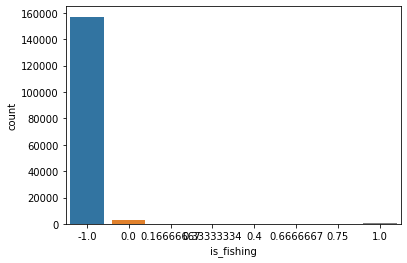

In [ ]:
import seaborn as sns
ax = sns.countplot(x="is_fishing",data=df)

From the chart above we can say that most of the vessels didn't report any fishing activity. We can see the same thing from the map below

In [ ]:
fig = px.scatter_mapbox(df, lat='lat', lon='lon', color='is_fishing', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

Since vessels with no fishing information won't be helpful to our model we are removing those data from the dataset.

In [ ]:
df= df[df['is_fishing'] != -1].copy()
df.head()

mmsi     timestamp  ...  is_fishing  source
46903  1.848346e+13  1.427865e+09  ...         0.0     gfw
46904  1.848346e+13  1.427866e+09  ...         0.0     gfw
46905  1.848346e+13  1.427867e+09  ...         0.0     gfw
46906  1.848346e+13  1.427867e+09  ...         0.0     gfw
46907  1.848346e+13  1.427868e+09  ...         0.0     gfw

[5 rows x 10 columns]

In [ ]:
df.tail()

mmsi     timestamp  ...  is_fishing  source
151999  2.145727e+14  1.432941e+09  ...         0.0     gfw
152000  2.145727e+14  1.432942e+09  ...         0.0     gfw
152001  2.145727e+14  1.432943e+09  ...         0.0     gfw
152002  2.145727e+14  1.432944e+09  ...         0.0     gfw
152003  2.145727e+14  1.432947e+09  ...         0.0     gfw

[5 rows x 10 columns]

In [ ]:
df.shape

(4250, 10)

Now we can see that we only have the vessel data where the vessel provided fishing information.

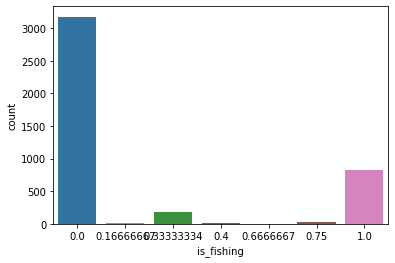

In [ ]:
ax = sns.countplot(x="is_fishing",data=df)

In [ ]:
fig = px.scatter_mapbox(df, lat='lat', lon='lon', color='is_fishing', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

From this dataframe we are going to create a boolian feature that would tell us only if the vessel is fishing or not.

In [ ]:
df['fishing'] = df['is_fishing'] > 0
df.head()

mmsi     timestamp  ...  source  fishing
46903  1.848346e+13  1.427865e+09  ...     gfw    False
46904  1.848346e+13  1.427866e+09  ...     gfw    False
46905  1.848346e+13  1.427867e+09  ...     gfw    False
46906  1.848346e+13  1.427867e+09  ...     gfw    False
46907  1.848346e+13  1.427868e+09  ...     gfw    False

[5 rows x 11 columns]

In [ ]:
df['fishing'] = df['fishing'].astype(int)
df.head()

mmsi     timestamp  ...  source  fishing
46903  1.848346e+13  1.427865e+09  ...     gfw        0
46904  1.848346e+13  1.427866e+09  ...     gfw        0
46905  1.848346e+13  1.427867e+09  ...     gfw        0
46906  1.848346e+13  1.427867e+09  ...     gfw        0
46907  1.848346e+13  1.427868e+09  ...     gfw        0

[5 rows x 11 columns]

From the map below we can have a good idea which vessels are fishing.

In [ ]:
fig = px.scatter_mapbox(df, lat='lat', lon='lon', color='fishing', opacity=0.1)
fig.update_layout(mapbox_style='stamen-terrain')
fig.show()

# Feature Engineering
Now we are gonna create some new features which we will use to build our model later.

Getting day, month and year from Timestamp

In [ ]:
df['date'] = pd.to_datetime(df['timestamp'], unit = 's')
df.head()

mmsi     timestamp  ...  fishing                date
46903  1.848346e+13  1.427865e+09  ...        0 2015-04-01 05:12:32
46904  1.848346e+13  1.427866e+09  ...        0 2015-04-01 05:24:34
46905  1.848346e+13  1.427867e+09  ...        0 2015-04-01 05:38:33
46906  1.848346e+13  1.427867e+09  ...        0 2015-04-01 05:50:33
46907  1.848346e+13  1.427868e+09  ...        0 2015-04-01 06:02:52

[5 rows x 12 columns]

In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df.head()

mmsi     timestamp  distance_from_shore  ...  month  day  hour
46903  1.848346e+13  1.427865e+09                  0.0  ...      4    1     5
46904  1.848346e+13  1.427866e+09                  0.0  ...      4    1     5
46905  1.848346e+13  1.427867e+09                  0.0  ...      4    1     5
46906  1.848346e+13  1.427867e+09                  0.0  ...      4    1     5
46907  1.848346e+13  1.427868e+09                  0.0  ...      4    1     6

[5 rows x 16 columns]

Getting Region(area) from longitude and latitude.

In [ ]:
def area (row):
   if row['lon'] < -30:
      return 'America'
   if row['lon'] > 60 :
      return 'Asia'
   if -30 < row['lon'] < 60:
      return 'Africa'
   return 'Other'

df['area'] = df.apply (lambda row: area(row), axis=1)

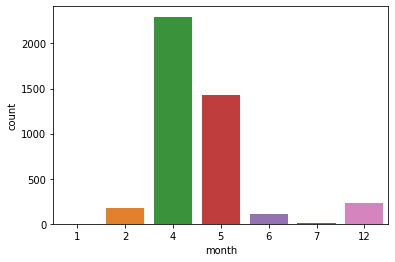

In [ ]:
ax = sns.countplot(x="month",data=df)

In [ ]:
import calendar
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['day'] = df['day'].astype(str)
df['hour'] = df['hour'].astype(str)
df.dtypes


mmsi                          float64
timestamp                     float64
distance_from_shore           float64
distance_from_port            float64
speed                         float64
course                        float64
lat                           float64
lon                           float64
is_fishing                    float64
source                         object
fishing                         int64
date                   datetime64[ns]
year                            int64
month                          object
day                            object
hour                           object
area                           object
dtype: object

In [ ]:
df.head()

mmsi     timestamp  distance_from_shore  ...  day  hour    area
46903  1.848346e+13  1.427865e+09                  0.0  ...    1     5  Africa
46904  1.848346e+13  1.427866e+09                  0.0  ...    1     5  Africa
46905  1.848346e+13  1.427867e+09                  0.0  ...    1     5  Africa
46906  1.848346e+13  1.427867e+09                  0.0  ...    1     5  Africa
46907  1.848346e+13  1.427868e+09                  0.0  ...    1     6  Africa

[5 rows x 17 columns]

# Model
We will use random forest classifier model as our predictive model as it is suitable for both numerical and categorical variables.

In [ ]:
!pip install category_encoders

Importing necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Train-test split

In [ ]:
train , test = train_test_split(df,train_size=0.80,test_size=0.20)

train.shape , test.shape

((3400, 17), (850, 17))

In [ ]:
df.head(1)

mmsi     timestamp  distance_from_shore  ...  day  hour    area
46903  1.848346e+13  1.427865e+09                  0.0  ...    1     5  Africa

[1 rows x 17 columns]

Feature selection

In [ ]:
#features = ['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'year', 'month', 'day', 'hour', 'America?', 'Asia?', 'Africa?']
features = ['distance_from_port', 'speed', 'lat', 'lon', 'month','area']
target = ['fishing']

In [ ]:
x_train = train[features]
y_train = train[target]


x_test = test[features]
y_test = test[target]

Fitting model

In [ ]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    RandomForestClassifier(random_state=42, n_jobs=-1)
)

pipeline.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py:394: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['month', 'area'], use_cat_names=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

Generating model and checking accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9623529411764706


In [ ]:
print("Train accuracy", pipeline.score(x_train,y_train))
print("Test accuracy", pipeline.score(x_test,y_test))

Train accuracy 1.0
Test accuracy 0.9623529411764706


It looks like we have generated a highly accurate model. But since the data very imbalanced (A massive percentage of the data belongs to one class) Accuracy shouldn't be the soul metric of the model. So we are also gonna check precision and recall of the model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



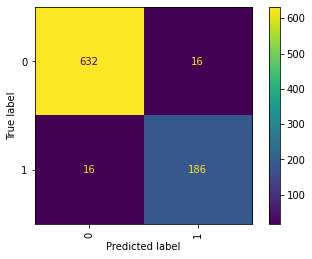

In [ ]:
import sklearn
sklearn.__version__

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, x_test, y_test, values_format='.0f', xticks_rotation='vertical')

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       648
           1       0.92      0.92      0.92       202

    accuracy                           0.96       850
   macro avg       0.95      0.95      0.95       850
weighted avg       0.96      0.96      0.96       850



As we can see the the model also has a high precision, and a high f1 score. For now we should be happy with our model. We are gonna download our model to use in our web app using 'Pickle'

In [ ]:
#import pickle 
#pickle.dump(pipeline, open("model.p", "wb")) 
#from_pickle = pickle.load(open("model.p", "rb"))

Finally we will make a visualization that shows how different features affected our model.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Get encoded values
encoder = pipeline.named_steps['onehotencoder']
encoded = encoder.transform(x_train)
print ('Print x_train shape after encoding', encoded.shape)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

Print x_train shape after encoding (3400, 14)


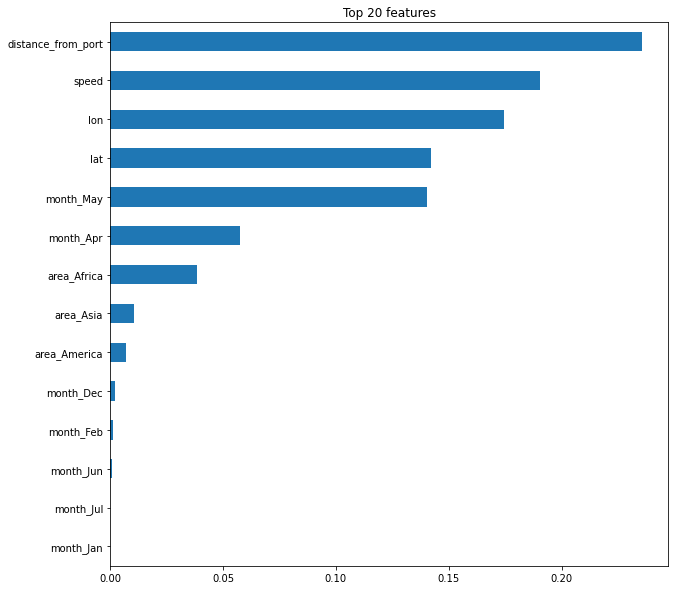

In [ ]:
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

# Web application
This model is being used in the 'Fishing predictor app' Where you can insert some info to find out if the vessel is fishing, and the probability of it.

[Fishing predictor app](http://fishing-predictor.herokuapp.com/)

[Github repo](https://github.com/Ekram49/gfw)

# Future work to be done

1. Tune the parameters of the model for better accuracy/precision
2. Try different predictive models.
3. Try to create and use new features.

# Ekram Ahmed
[Linkedin](https://www.linkedin.com/in/ekram-ullah-ahmed/)